## Set path

In [1]:
import sys
import os
os.chdir('..')
o_path = os.getcwd()
print(o_path)
sys.path.append(o_path) # set path so that modules from other foloders can be loaded

/home/zwzhu/code/open/docta


## Docta CIFAR-10

In [2]:
import torch
torch.cuda.set_device(1)
%run ./tools/docta_cifar10.py

==== Docta: Doctor for your data. Current version: 0.0 ====
Files already downloaded and verified
True T is 
[[65.   6.6  7.2  1.9  1.9  2.3  1.9  1.7  8.5  3.1]
 [ 4.3 59.2  1.5  2.6  1.7  1.5  1.4  1.4  1.6 24.7]
 [ 5.5  3.7 63.2  4.6  5.9  4.8  5.   3.3  2.4  1.7]
 [ 4.   3.4  7.9 48.7  4.3 20.6  4.7  2.4  2.1  1.9]
 [ 3.9  3.3  7.   4.  48.8 10.6  3.9 15.2  2.1  1.2]
 [ 3.3  2.8  5.3 18.3  4.  58.   2.7  2.9  1.2  1.3]
 [ 3.8  3.8  8.4  7.6  5.1  5.8 59.4  2.9  2.   1.3]
 [ 4.   2.8  2.4  2.2  5.1  6.2  2.3 72.2  1.7  1.1]
 [ 8.2  7.3  2.2  1.4  2.1  1.9  1.6  2.2 68.3  4.8]
 [ 4.2 28.2  1.7  2.1  1.8  1.8  1.2  1.4  2.6 55.1]]


49it [06:00,  7.35s/it]


Save 49 instances to ./results/CIFAR_c10/embedded_CIFAR_c10_0.pt
[0, 1]
idx range for training data [0, 0]
#Samples (dataset-train) 50000.
Estimating consensus patterns...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:40<00:00,  4.41s/it]


Estimating consensus patterns... [Done]
Use cpu to solve equations


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1501/1501 [00:29<00:00, 50.80it/s]


Solve equations... [Done]
T_est is 
[[78.8  3.7  3.1  1.7  1.8  1.6  1.6  1.5  4.   2.3]
 [ 2.9 74.   1.5  2.   1.5  1.6  1.4  1.3  2.  11.7]
 [ 3.8  2.4 75.8  3.1  3.6  2.9  3.4  2.1  1.7  1.2]
 [ 2.1  1.8  3.7 74.4  2.3  9.1  3.   1.2  1.2  1.1]
 [ 2.2  1.5  3.6  2.4 75.6  4.5  2.5  5.9  1.1  0.8]
 [ 2.   1.9  3.3  8.2  3.2 73.8  2.1  2.6  1.4  1.5]
 [ 1.9  2.1  3.9  3.7  2.9  3.4 78.4  1.8  1.   0.8]
 [ 2.3  1.9  1.7  1.4  4.   3.4  1.8 81.3  1.4  0.8]
 [ 4.7  4.   1.5  0.8  1.6  1.1  1.2  1.4 81.2  2.5]
 [ 2.2 15.2  0.9  1.3  1.3  0.9  0.8  0.8  1.8 74.7]]
p_est is 
[[10.4]
 [12. ]
 [11.1]
 [ 9.1]
 [ 7.6]
 [11.7]
 [ 8.4]
 [10.8]
 [ 9.4]
 [ 9.5]]
Detecting label errors with simifeat.
Use SimiFeat-rank to detect label errors.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21/21 [01:00<00:00,  2.86s/it]


[SimiFeat] We find 13425 corrupted instances from 100000 instances
Files already downloaded and verified
True T is 
[[65.   6.6  7.2  1.9  1.9  2.3  1.9  1.7  8.5  3.1]
 [ 4.3 59.2  1.5  2.6  1.7  1.5  1.4  1.4  1.6 24.7]
 [ 5.5  3.7 63.2  4.6  5.9  4.8  5.   3.3  2.4  1.7]
 [ 4.   3.4  7.9 48.7  4.3 20.6  4.7  2.4  2.1  1.9]
 [ 3.9  3.3  7.   4.  48.8 10.6  3.9 15.2  2.1  1.2]
 [ 3.3  2.8  5.3 18.3  4.  58.   2.7  2.9  1.2  1.3]
 [ 3.8  3.8  8.4  7.6  5.1  5.8 59.4  2.9  2.   1.3]
 [ 4.   2.8  2.4  2.2  5.1  6.2  2.3 72.2  1.7  1.1]
 [ 8.2  7.3  2.2  1.4  2.1  1.9  1.6  2.2 68.3  4.8]
 [ 4.2 28.2  1.7  2.1  1.8  1.8  1.2  1.4  2.6 55.1]]
Found 12953 label errors from 50000 samples
Saved cured labels to ./results/CIFAR_c10/cured_labels_CIFAR_c10.pt


## Load cured labels

In [3]:
cured_labels = torch.load('./results/CIFAR_c10/cured_labels_CIFAR_c10.pt')

## A help function for visualization

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
def visualize_result(num_show, data, noisy_label, cured_labels, label_name):
    plt.rcParams["figure.figsize"] = (10,12)
    size = num_show
    width = int(size / 3)
    cnt = 0
    for i in range(len(dataset)):
        if noisy_label[i] != cured_labels[i]:
            ax = plt.subplot(width,3,cnt+1)
            ax.imshow(data.feature[i])
            ax.set_title(f'Noisy label: {label_name[noisy_label[i]]}. \nSuggest label: {label_name[cured_labels[i]]}.')
            ax.axis('off')
            cnt += 1
        if cnt == num_show:
            break
    plt.show()

## Visualize results

Files already downloaded and verified
True T is 
[[65.   6.6  7.2  1.9  1.9  2.3  1.9  1.7  8.5  3.1]
 [ 4.3 59.2  1.5  2.6  1.7  1.5  1.4  1.4  1.6 24.7]
 [ 5.5  3.7 63.2  4.6  5.9  4.8  5.   3.3  2.4  1.7]
 [ 4.   3.4  7.9 48.7  4.3 20.6  4.7  2.4  2.1  1.9]
 [ 3.9  3.3  7.   4.  48.8 10.6  3.9 15.2  2.1  1.2]
 [ 3.3  2.8  5.3 18.3  4.  58.   2.7  2.9  1.2  1.3]
 [ 3.8  3.8  8.4  7.6  5.1  5.8 59.4  2.9  2.   1.3]
 [ 4.   2.8  2.4  2.2  5.1  6.2  2.3 72.2  1.7  1.1]
 [ 8.2  7.3  2.2  1.4  2.1  1.9  1.6  2.2 68.3  4.8]
 [ 4.2 28.2  1.7  2.1  1.8  1.8  1.2  1.4  2.6 55.1]]


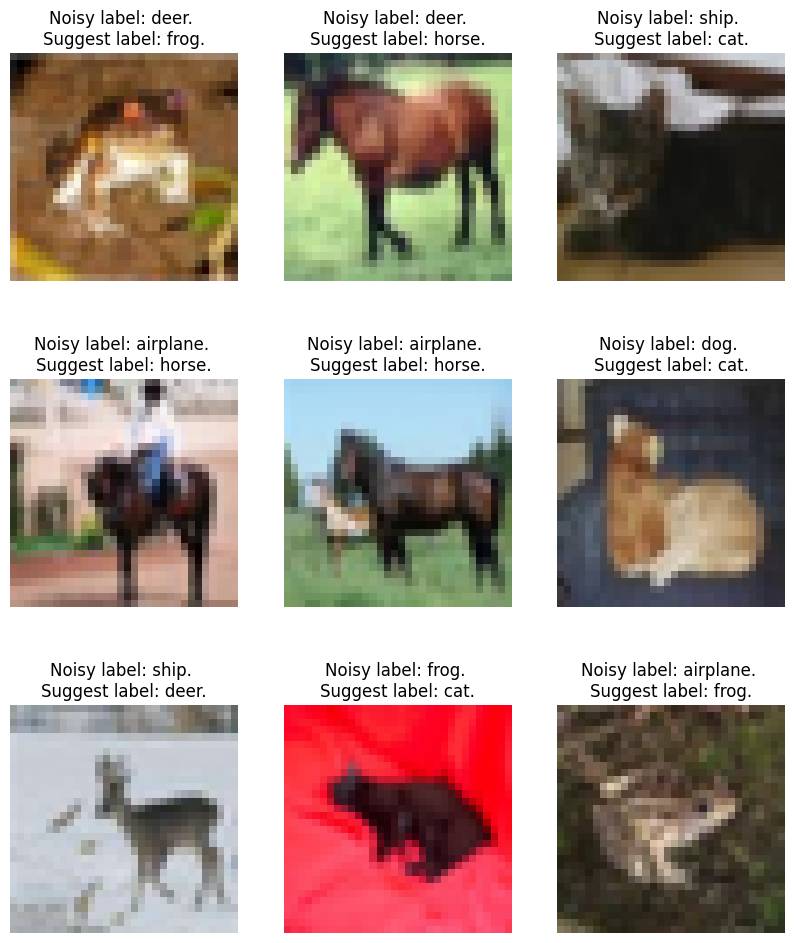

In [5]:
dataset = Cifar10_noisy(cfg, train=True)
noisy_label = dataset.label[:, 1]
feature = dataset.feature
label_name = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_show = 9 # show 10 pics
visualize_result(num_show, dataset, noisy_label, cured_labels, label_name)
